<font size="+5">#09. Componentes Principales (PCA)</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Coches** (columnas).
> - Para distintas **Marcas/Modelos de coche** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)
```

In [1]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet caprice classic,17.5,8,305.0,145.0,3880,12.5,77,usa
ford f108,13.0,8,302.0,130.0,3870,15.0,76,usa
plymouth horizon 4,34.7,4,105.0,63.0,2215,14.9,81,usa
pontiac catalina,16.0,8,400.0,170.0,4668,11.5,75,usa
toyota corolla,28.0,4,97.0,75.0,2155,16.4,76,japan
mazda 626,31.3,4,120.0,75.0,2542,17.5,80,japan
fiat 124 tc,26.0,4,116.0,75.0,2246,14.0,74,europe
plymouth reliant,30.0,4,135.0,84.0,2385,12.9,81,usa
ford pinto runabout,21.0,4,122.0,86.0,2226,16.5,72,usa


# Seleccionar Todas las Variables para el Análisis de Clúster

> Todas son explicativas, por lo que `model.fit(df)`

In [2]:
import pandas as pd

In [3]:
df=df.dropna()

In [4]:
df=pd.get_dummies(df,drop_first=True)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,1


# Escalar los Datos

> 1. Recuerda que no es lo mismo incrementar 1 kilogramo que un 1 metro de algura.
> 2. La solución está en `StandardScaler()`.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
datos_normalizados=scaler.fit_transform(X=df)

In [9]:
dfnorm=pd.DataFrame(datos_normalizados,columns=df.columns, index=df.index)

In [10]:
dfnorm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597


# Entrenar Modelo `KMeans()`

## Seleccionar Número Óptimo k de Clústers

> - Aplicar el método del codo.
> - Recuerda que este método es muy `subjetivo`.
> - Pueden haber más de 2-3 números posibles.

In [11]:
from sklearn.cluster import KMeans

In [12]:
error=[]

In [13]:
error

[]

## Entrenar Modelo con Número k de Clústers Óptimo

In [14]:
dfnorm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...,...
ford mustang gl,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.50239,0.774597
vw pickup,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-0.50239,-1.290994
dodge rampage,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.50239,0.774597


> `model.fit()`

# Realizar Predicciones

> - Son las mismas que `model.labels_`?

In [19]:
 for numero in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]: 
    
    model=KMeans(n_clusters=numero)

    model.fit(dfnorm)

    inercia=model.score(dfnorm)

    error.append(inercia)

    error

C:\Users\apoga\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [20]:
error

[-3527.999999999999,
 -3527.999999999999,
 -1855.3724919344506,
 -1367.5289157730379,
 -1091.0655795401112,
 -927.5566508553633,
 -850.5159112316769,
 -771.633152368515,
 -700.125577736362,
 -638.6403365325802,
 -601.4207387948654]

In [21]:
dfsel=dfnorm.copy()

In [22]:
dfsel['cluster']=model.predict(dfnorm)

In [23]:
dfsel.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,cluster
name,,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597,7
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597,4
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597,7
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597,7
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597,7
ford galaxie 500,-1.083498,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,-0.50239,0.774597,4
chevrolet impala,-1.211785,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,-0.50239,0.774597,4
plymouth fury iii,-1.211785,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,-0.50239,0.774597,4
pontiac catalina,-1.211785,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-0.50239,0.774597,4


# Visualizar Modelo

> - Haz un `scatterplot` con 2 variables.
> - Colorea los puntos según el grupo.
> Por qué están mezclados los grupos?
> Cómo lo solucionamos?
> - PCA. Siguiente apartado.

In [24]:
import matplotlib.pyplot as plt

In [25]:
dfgroup=dfsel.groupby('cluster')

In [26]:
dfgroup.get_group(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,cluster
name,,,,,,,,,,
renault 5 gtl,1.610521,-0.864014,-1.104311,-1.208817,-1.358669,1.110088,0.277358,-0.50239,-1.290994,2
volkswagen rabbit custom diesel,2.521356,-0.864014,-0.999058,-1.468949,-1.170061,2.162589,0.549168,-0.50239,-1.290994,2
volkswagen scirocco,1.033231,-0.864014,-1.008626,-0.870646,-1.164167,-0.232757,0.549168,-0.50239,-1.290994,2
vw rabbit custom,1.084545,-0.864014,-1.008626,-0.870646,-1.240789,-0.559396,0.820978,-0.50239,-1.290994,2
mercedes benz 300d,0.250683,-0.277023,-0.109195,-0.714566,0.651189,1.654485,0.820978,-0.50239,-1.290994,2
peugeot 504,0.481598,-0.864014,-0.511068,-0.870646,0.250396,3.360262,0.820978,-0.50239,-1.290994,2
fiat strada custom,1.777293,-0.864014,-0.989490,-0.922672,-0.999134,-0.305344,0.820978,-0.50239,-1.290994,2
vw rabbit,2.316097,-0.864014,-0.922511,-0.740580,-0.982631,-0.305344,1.092789,-0.50239,-1.290994,2
audi 4000,1.392433,-0.864014,-0.932079,-0.688553,-0.930764,0.093881,1.092789,-0.50239,-1.290994,2


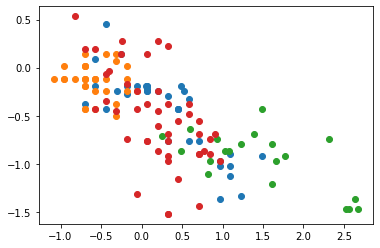

In [27]:
for grupo in [0,1,2,3]:
    plt.scatter(x='mpg',y='horsepower',data=dfgroup.get_group(grupo))


## Agrupación de Variables en Componentes Principales con `PCA()`

> Obviamente, no vamos a poder representar más que **2 variables en un Scatterplot**. Sin embargo, nuestro Análisis de Clúster ha tenido en cuenta más de 2 variables. Por este motivo debemos **Agrupar las Variables** que más se correlacionen en otras nuevas variables: las **Componentes Principales**.
>
> - La función `fit_transform()` nos devolverá una matriz con las nuevas variables.
> - Tras obtener la matriz, vamos a representarla en un `DataFrame` con la función `pd.DataFrame(matriz)`.
> - Posteriormente renombraremos las columnas. Por ejemplo, si el `DataFrame` tiene 4 columnas, deberemos renombrarlas aplicando el siguiente código: `matriz.columns = ['PC1', 'PC2', 'PC3', 'PC4']`.

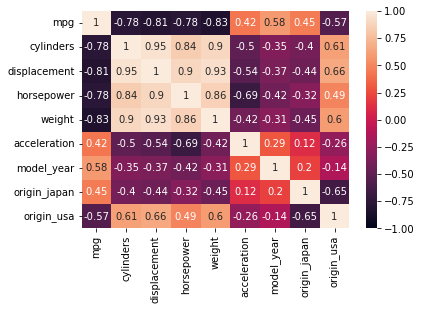

In [28]:
sns.heatmap(dfnorm.corr(), annot=True, vmin=-1);

## Visualizar las 2 Primeras Componentes con el Cluster

> - Eje X: `PC1`
> - Eje Y: `PC2`
> - `hue = model.labels_`
> - (Opcional) Representar los centroides. Deberíamos transformar los centroides en términos de Componentes Principales con `modelopca.transform(datos)`.

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
dfpca = pd.DataFrame(pca.fit_transform(dfnorm), index=df.index)

In [31]:
pca_columns = ['PC' + str(i+1) for i in range(pca.n_components_)]
dfpca.columns = pca_columns

In [32]:
dfpca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
name,,,,,,,,,
chevrolet chevelle malibu,2.768102,0.653669,0.661643,-0.585333,-0.382837,0.750140,-0.468860,-0.095520,-0.120586
buick skylark 320,3.561796,0.961842,0.474659,-0.511149,-0.199102,0.489416,0.009370,0.213293,0.073620
plymouth satellite,3.070489,0.942217,0.473735,-0.870489,-0.313946,0.723960,-0.214271,0.143188,-0.083888
amc rebel sst,3.020337,0.789743,0.661786,-0.571355,-0.319349,0.528048,-0.229069,0.292331,-0.147325
ford torino,3.007717,0.965885,0.517871,-0.996022,-0.358667,0.575475,-0.469787,-0.001799,-0.174247


In [33]:
weights = pd.DataFrame(pca.components_.T, columns=dfpca.columns, index=dfnorm.columns)
weights.style.applymap(lambda v: f'background-color: darkred; opacity: {int(v*100)+40}%;')\
        .applymap(lambda v: f'color: white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
mpg,-0.374705,-0.046189,-0.257296,-0.199342,0.031205,0.755299,0.354683,-0.195030,-0.127427
cylinders,0.390297,0.020630,-0.163054,0.222610,-0.000059,0.472667,-0.549276,0.314814,-0.383243
displacement,0.404817,0.014770,-0.150779,0.153581,-0.009156,0.297809,0.004035,-0.121299,0.828299
horsepower,0.385138,0.233024,-0.156907,-0.007860,0.169984,-0.055093,0.667713,0.528806,-0.123615
weight,0.390189,-0.040777,-0.136605,0.342554,0.205570,-0.106440,0.196891,-0.707468,-0.342374
acceleration,-0.249862,-0.447718,0.279268,0.743318,0.005795,0.103036,0.213376,0.221399,0.037513
model_year,-0.201926,-0.346888,-0.826340,0.063921,0.175107,-0.294713,-0.113877,0.128827,0.069917
origin_japan,-0.228405,0.607000,-0.276675,0.411797,-0.570073,-0.068650,0.033738,-0.047016,-0.014582
origin_usa,0.295694,-0.502024,-0.061804,-0.208639,-0.756379,-0.029489,0.168039,-0.013082,-0.108621


## Interpretar Visualización

> - Qué tienen que ver `PC1` Y `PC2` con las variables originales?
> - Por qué se distinguen los grupos? Uno se sitúa más a la derecha? Otro más a la izquierda? Uno más arriba o abajo? Por qué?

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] En este capítulo empezaremos a ir conectando los puntos de estadística y serás capaz de ir simplificando la gran variedad que existe en ella.
- [ ] Nos daremos cuenta de lo simple que es la estadística y que podría resumirse en la **Suma de Cuadrados**.
- [ ] Distinguir cuándo usar un modelo u otro porque no vale todo con todo. Sino que hay que ir viendo las soluciones concretas a cada necesidad.
- [ ] Entender la necesidad de **Normalizar** los datos.
- [ ] Familiarizarnos, aún más, con el término de la optimización.
- [ ] Ver de forma práctica cómo se usa el **Álgebra en Machine Learning**.